In [1]:

# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
import pandas as pd
import numpy as np
from prophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import calendar
from datetime import datetime
from prophet.diagnostics import performance_metrics



/home/sam/Documents/projects/practice/general/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### For Cluster 0

In [2]:
def change_date_format(date_string, new_format):

    parts = date_string.split('/')
    if len(parts) != 3:
        parts = date_string.split('-')
    if len(parts) != 3:
        print("Error: Invalid date format")
        return None

    try:
        for i in parts:
            if int(i) > 40:
                year = int(i)
            
        
        month = int(parts[1])

        

        # Create a new datetime object with the adjusted day value
        # days_in_month = calendar.monthrange(year, month)[1]
        date = datetime(year, month, 1)

        # Convert the new datetime object to the desired format
        new_date_string = date.strftime(new_format)
        return new_date_string
    except (ValueError, OverflowError) as e:
        print(f"Error: {e}")
        return None

In [8]:
def fb_prohet(path):
    df = read_csv(path, header=0)

    # prepare expected column names
    df.columns = ['ds', 'y']
    df['ds'] = df.apply(lambda x: change_date_format(x.ds, '%Y-%m-%d'), axis=1)

    # create test dataset, remove last 3 months
    train = df.drop(df.index[-12:])
    print(train.tail())
    # define the model
    model = Prophet()
    # fit the model
    model.fit(train)
    # define the period for which we want a prediction
    future = list()
    for i in range(1, 13):
        date = '2016-%01d' % i
        future.append([date])
    future = DataFrame(future)
    future.columns = ['ds']
    future['ds'] = to_datetime(future['ds'])
    # use the model to make a forecast
    forecast = model.predict(future)
    # calculate MAE between expected and predicted values for december
    y_true = df['y'][-12:].values
    y_pred = forecast['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    print('MAE: %.3f' % mae)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print('RMSE: %.3f' % rmse)
    # plot expected vs actual
    pyplot.plot(y_true, label='Actual')
    pyplot.plot(y_pred, label='Predicted')
    pyplot.legend()
    pyplot.show()

22:49:24 - cmdstanpy - INFO - Chain [1] start processing
22:49:24 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1800
32  2014-09-01  1700
33  2014-10-01  2300
34  2014-11-01  2400
35  2014-12-01  2200
MAE: 125.218
RMSE: 147.891


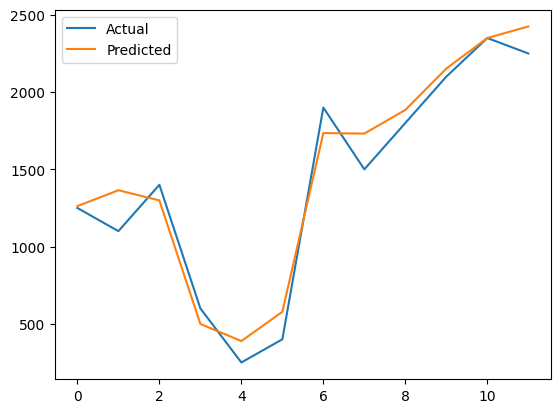

In [18]:
fb_prohet('../data/new_single_cluster_0.csv')


22:49:16 - cmdstanpy - INFO - Chain [1] start processing


22:49:16 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1531
32  2014-09-01  1675
33  2014-10-01  2218
34  2014-11-01  2147
35  2014-12-01  2334
MAE: 220.076
RMSE: 253.656


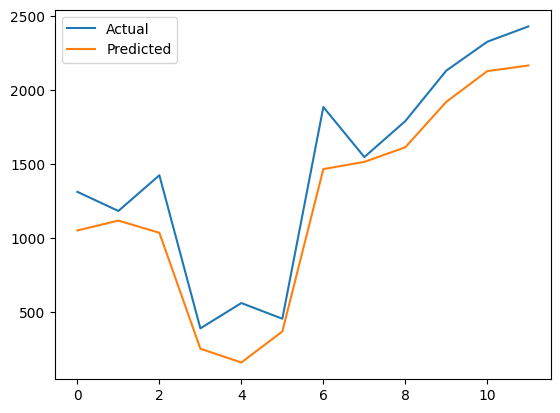

In [17]:
fb_prohet('../data/new_single_cluster_00.csv')


22:49:06 - cmdstanpy - INFO - Chain [1] start processing


22:49:06 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1723
32  2014-09-01  1854
33  2014-10-01  2139
34  2014-11-01  2391
35  2014-12-01  2346
MAE: 131.439
RMSE: 146.740


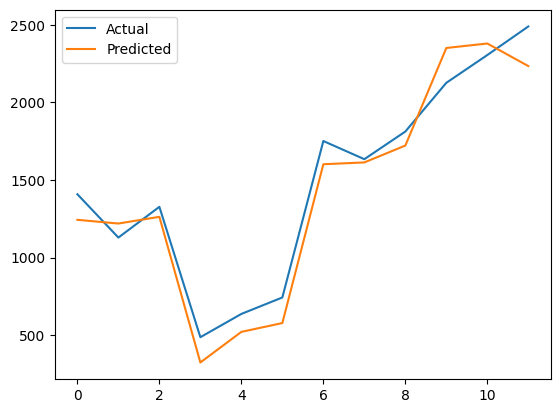

In [16]:
fb_prohet('../data/new_single_cluster_000.csv')


22:48:48 - cmdstanpy - INFO - Chain [1] start processing


22:48:48 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1764
32  2014-09-01  1837
33  2014-10-01  2193
34  2014-11-01  2216
35  2014-12-01  2398
MAE: 119.284
RMSE: 137.503


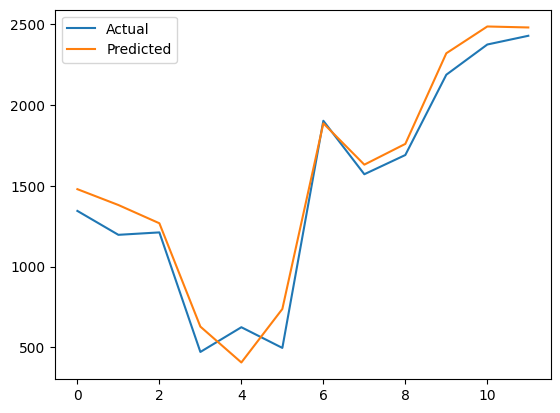

In [15]:
fb_prohet('../data/new_single_cluster_0000.csv')


22:48:34 - cmdstanpy - INFO - Chain [1] start processing
22:48:34 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1785
32  2014-09-01  1612
33  2014-10-01  2245
34  2014-11-01  2408
35  2014-12-01  2193
MAE: 80.609
RMSE: 95.808


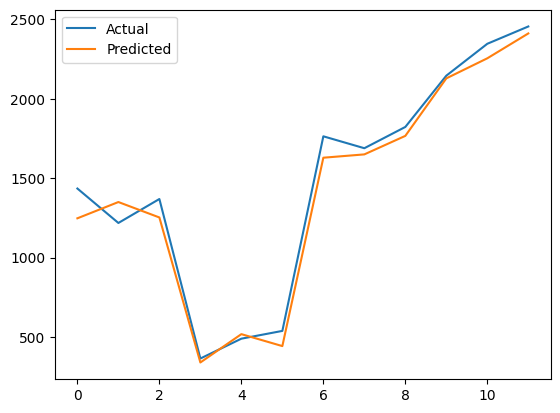

In [14]:
fb_prohet('../data/new_single_cluster_00000.csv')

### For Clustring 1

22:49:41 - cmdstanpy - INFO - Chain [1] start processing


22:49:42 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1381
32  2014-09-01  1475
33  2014-10-01  2018
34  2014-11-01  1947
35  2014-12-01  2134
MAE: 77.870
RMSE: 94.255


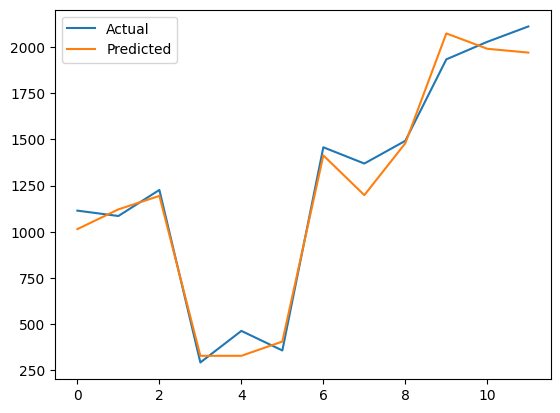

In [19]:
fb_prohet('../data/new_single_cluster_1.csv')


22:49:50 - cmdstanpy - INFO - Chain [1] start processing


22:49:50 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1423
32  2014-09-01  1554
33  2014-10-01  2139
34  2014-11-01  2091
35  2014-12-01  1946
MAE: 120.726
RMSE: 144.066


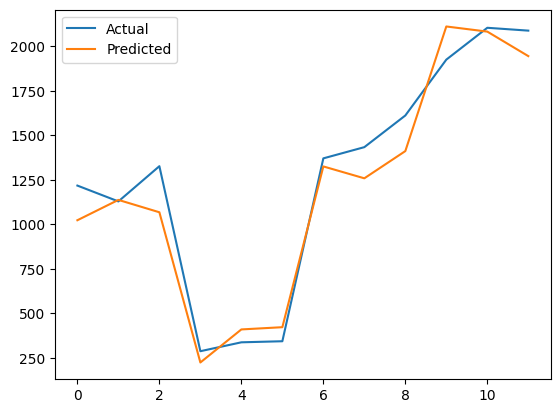

In [20]:
fb_prohet('../data/new_single_cluster_11.csv')


22:49:58 - cmdstanpy - INFO - Chain [1] start processing


22:49:58 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1464
32  2014-09-01  1737
33  2014-10-01  2093
34  2014-11-01  2116
35  2014-12-01  1998
MAE: 109.354
RMSE: 135.844


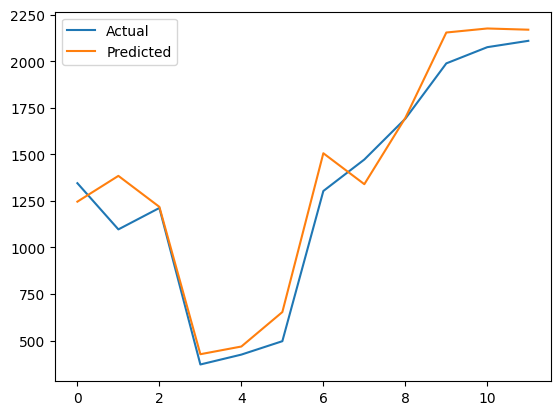

In [21]:
fb_prohet('../data/new_single_cluster_111.csv')


22:50:14 - cmdstanpy - INFO - Chain [1] start processing


22:50:14 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1385
32  2014-09-01  1612
33  2014-10-01  2245
34  2014-11-01  2108
35  2014-12-01  1993
MAE: 75.392
RMSE: 99.556


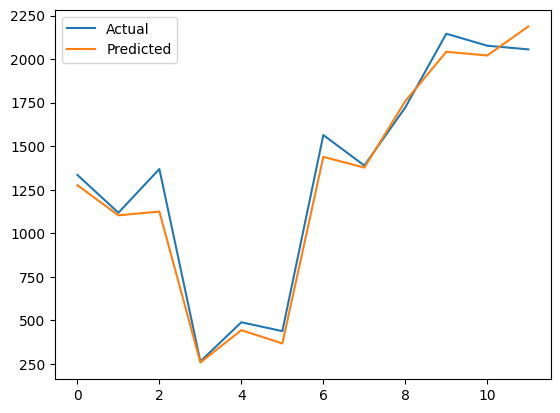

In [22]:
fb_prohet('../data/new_single_cluster_1111.csv')


22:50:24 - cmdstanpy - INFO - Chain [1] start processing
22:50:24 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1253
32  2014-09-01  1573
33  2014-10-01  2034
34  2014-11-01  2009
35  2014-12-01  2165
MAE: 105.759
RMSE: 128.662


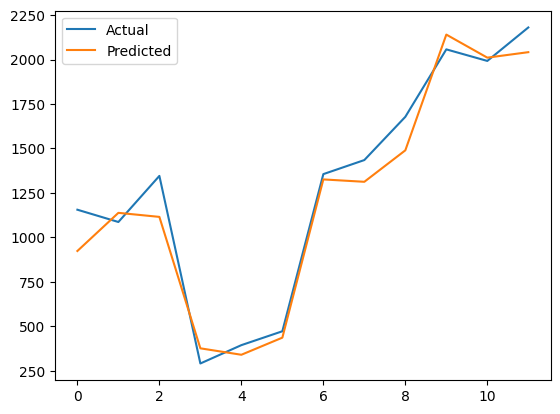

In [23]:
fb_prohet('../data/new_single_cluster_11111.csv')

### For cluster 2

22:50:42 - cmdstanpy - INFO - Chain [1] start processing


22:50:42 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1881
32  2014-09-01  1975
33  2014-10-01  2718
34  2014-11-01  2847
35  2014-12-01  2834
MAE: 84.328
RMSE: 103.708


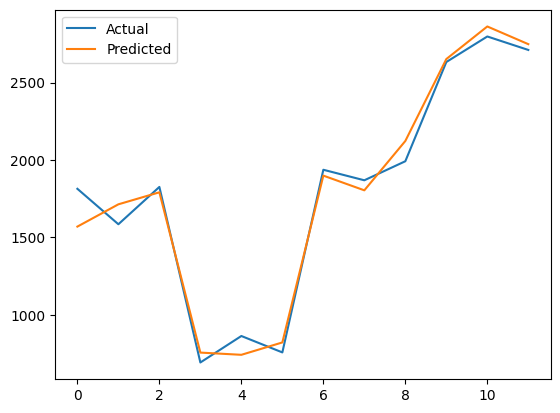

In [24]:
fb_prohet('../data/new_single_cluster_2.csv')


22:50:50 - cmdstanpy - INFO - Chain [1] start processing


22:50:50 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1823
32  2014-09-01  2054
33  2014-10-01  2719
34  2014-11-01  2791
35  2014-12-01  2746
MAE: 67.775
RMSE: 90.165


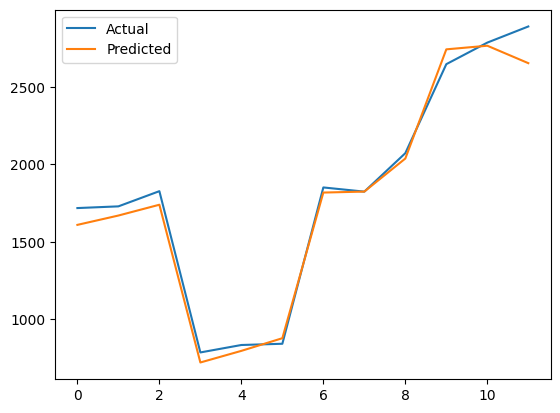

In [25]:
fb_prohet('../data/new_single_cluster_22.csv')


22:51:03 - cmdstanpy - INFO - Chain [1] start processing


22:51:04 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1914
32  2014-09-01  2037
33  2014-10-01  2723
34  2014-11-01  2787
35  2014-12-01  2876
MAE: 50.227
RMSE: 71.591


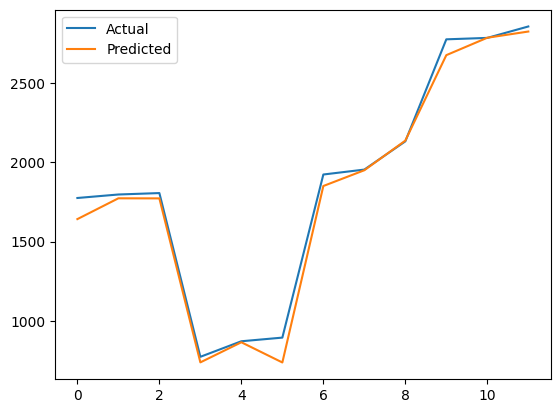

In [26]:
fb_prohet('../data/new_single_cluster_222.csv')


22:51:19 - cmdstanpy - INFO - Chain [1] start processing


22:51:19 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1851
32  2014-09-01  2094
33  2014-10-01  2736
34  2014-11-01  2789
35  2014-12-01  2895
MAE: 71.029
RMSE: 86.068


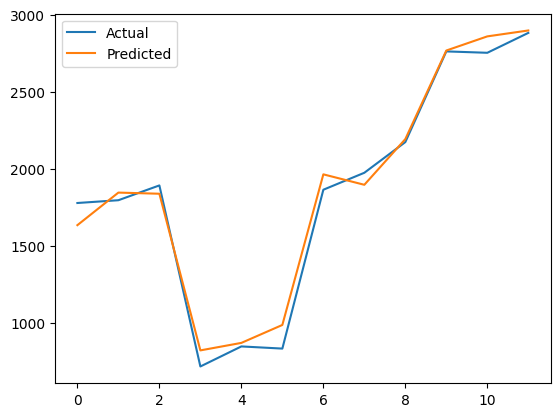

In [27]:
fb_prohet('../data/new_single_cluster_2222.csv')


22:51:33 - cmdstanpy - INFO - Chain [1] start processing


22:51:33 - cmdstanpy - INFO - Chain [1] done processing


            ds     y
31  2014-08-01  1968
32  2014-09-01  2048
33  2014-10-01  2694
34  2014-11-01  2853
35  2014-12-01  2896
MAE: 38.035
RMSE: 43.205


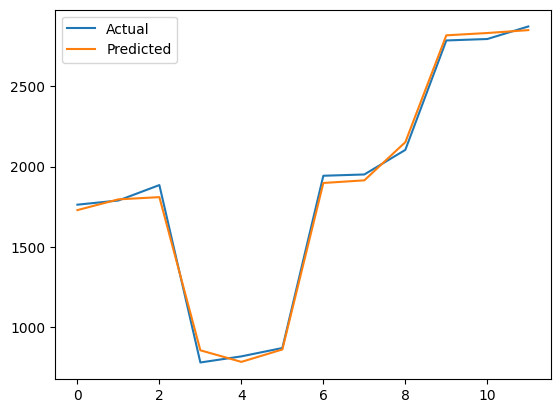

In [28]:
fb_prohet('../data/new_single_cluster_22222.csv')